# Coveriance and Correlation

In [1]:
# environmental variables, settings and imports
%run '000-env.ipynb'

<IPython.core.display.Javascript object>

---

## Relationship between variables

A **dependent** variable is one being tested and measured in an experiment. It is ‘dependent’ on the independent variable. Whenever the values of independent variables are changed, dependent variables respond accordingly.An **independent** variable is one that is changed in an experiment to test the effects on the dependent variables.

## Coveriance

Covariance is a measure of how two variables will respond to the same stimuli.

**Covariance = ∑ (x – x̄) (y – ȳ)/n**

$S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$

We only judge the direction of the relationship using covariance and not its magnitude

## Correlation

A correlation between variables indicates that as one variable changes in value, the other tends to change in a specific direction.

The correlation or the correlation coefficient is obtained by normalizing the covariance. It is obtained when we divide the covariance by the product of individual standard deviations of the variables.

* Correlation coefficients are used to measure the strength of the linear relationship between two variables.
* A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship.
* A value of zero indicates no relationship between the two variables being compared.

### Pearson R Correlation

Pearson R correlation is the most widely used correlation statistic to measure the degree of the relationship between variables.

The Pearson correlation coefficient is probably the most widely used measure for linear relationships between two normal distributed variables and thus often just called "correlation coefficient". Usually, the Pearson coefficient is obtained via a Least-Squares fit and a value of 1 represents a perfect positive relation-ship, -1 a perfect negative relationship, and 0 indicates the absence of a relationship between variables.

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

..and the estimate

$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
$

### Kendall Correlation

Kendall rank correlation measures the strength of dependence between two variables.

Similar to the Pearson correlation coefficient, Kendall's tau measures the degree of a monotone relationship between variables, and like Spearman's rho, it calculates the dependence between ranked variables, which makes is feasible for non-normal distributed data. Kendall tau can be calculated for continuous as well as ordinal data. Roughly speaking, Kendall's tau distinguishes itself from Spearman's rho by stronger penalization of non-sequential (in context of the ranked variables) dislocations.

$\tau = \frac{c-d}{c+d} = \frac{S}{
	\left(
	\begin{matrix} 
 	n \\
 	2
\end{matrix}
\right)}
= \frac{2S}{n(n-1)}
$

Kendall’s tau is a correlation measure for ordinal data.  
* c = number of concordant pairs.  
* d = number of discordant pairs.
* n = number of pairs

Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement. 

* Correlation between a student’s exam grade (A, B, C…) and the time spent studying put in categories (<2 hours, 2–4 hours, 5–7 hours…)
* Customer satisfaction (e.g. Very Satisfied, Somewhat Satisfied, Neutral…) and delivery time (< 30 Minutes, 30 minutes — 1 Hour, 1–2 Hours etc)

Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test. This is also the best alternative to Spearman correlation (non-parametric) when your sample size is small and has many tied ranks.

### Spearman Correlation

Spearman rank correlation is used to measure the degree of association between two variables.

Related to the Pearson correlation coefficient, the Spearman correlation coefficient (rho) measures the relationship between two variables. Spearman's rho can be understood as a rank-based version of Pearson's correlation coefficient, which can be used for variables that are not normal-distributed and have a non-linear relationship. Also, its use is not only restricted to continuous data, but can also be used in analyses of ordinal attributes.

$\rho = 1- {\frac {6 \sum d_i^2}{n(n^2 - 1)}}$

where  
d = the pairwise distances of the ranks of the variables xi and yi .  
n = the number of samples.  

Values are converted to rank orders. And n expected to be: $n>10$

### Non-Parametric Correlation Comparison: Kendall vs Spearman

* If two variables are independent, $\rho$ and $\tau$ are highly correlated. So it doesn't really matter which to choose.
* Spearman $\rho$ gives greater weight to ranks of pairs that are further apart, so it can be more affected by outliers, whereas Kendall $\tau$ weights all discordants equally.
* Spearman $\rho$ is better when there is more uncertainty about the reliability of close ranks.

---

## Resources

https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp

https://www.udemy.com/course/probability-and-statistics-for-business-and-data-science/learn/lecture/11062498#overview

http://www.statisticslectures.com/topics/spearman/

.

In [4]:
youGrid('mG__Wpp9dns', 'bAstMHbytK0', 'YpG2MlulP_o', '4EXNedimDMs')

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

.

---

## Examples

<span style="font-size:large; color:blue">
Temperature vs. units of ice cream sold
</span>

In [23]:
# Temp in Fahreneit and units of ice cream sold
tmp_ice = np.array([[98,15], [87,12], [90,10], [85,10], [95,16], [75,7]])

In [24]:
# convert F to C
tmp_ice[:,:1] = np.round(scipy.constants.convert_temperature(tmp_ice[:,:1], 'f', 'c'))

In [27]:
# numpy coveriance function, returns: The covariance matrix of the variables.
np.cov(tmp_ice, rowvar=False)

array([[21.06666667, 14.33333333],
       [14.33333333, 11.46666667]])

The coveriance matrix results to a positive relationship

In [37]:
# numpy correlation coeffient: matrix
np.corrcoef(tmp_ice[:,:1].flatten(),tmp_ice[:,1:].flatten(), rowvar=True)

array([[1.        , 0.92221184],
       [0.92221184, 1.        ]])

pearson r = 0.922

In [47]:
# same correlation described with Scipy's Stats library:
# Pearson correlation coefficient and p-value for testing non-correlation.
stats.pearsonr(tmp_ice[:,:1].flatten(), tmp_ice[:,1:].flatten())

(0.9222118430947978, 0.008841148066232036)

First value is the Pearson correlation and second one is the p-value.  
The calculation of the p-value relies on the assumption that each dataset is normally distributed.

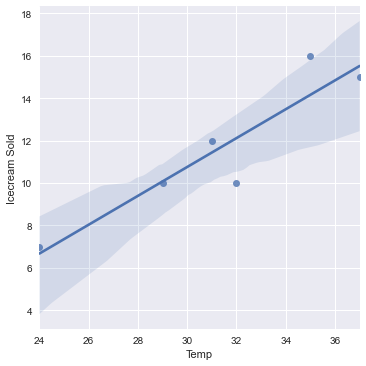

In [44]:
sns.lmplot(data=pd.DataFrame(tmp_ice, columns=["Temp", "Icecream Sold"]), x='Temp', y='Icecream Sold');

There is a positive correlation (0.922) between temperature and ice creams sold.

.

<span style="font-size:large; color:blue">
Price vs. units sold
</span>

In [38]:
# given [price, units_sold] array
usd_unitsold=np.array([[10,55], [11,57],[15,49],[19,48],[22,39]])

In [39]:
# convert np array to pandas
df_usd_unitsold = pd.DataFrame(usd_unitsold, columns=['USD', 'Units Sold'])

In [40]:
# pandas corr function takes care of the coeffient
df_usd_unitsold.corr()

,USD,Units Sold
USD,1.000,-0.948
Units Sold,-0.948,1.000


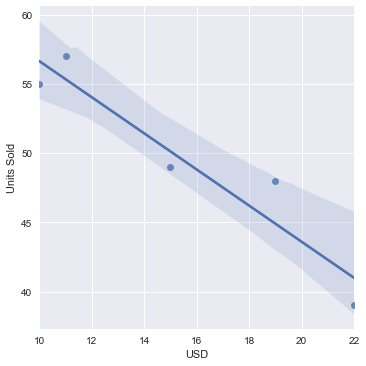

In [43]:
# Seaborn lmplot: Plot data and regression model fits across a FacetGrid.
sns.lmplot(data=df_usd_unitsold, x='USD', y='Units Sold');

The negative correlation between price increase and units sold is fairly seen on the plot.

.

<span style="font-size:large; color:blue">
Vega Cars Dataset: Heatmap from dataframe
</span>

In [48]:
# Vega cars dataset as pd dataframe
cars = vds.cars()

**Seaborn correlation Heatmap function with one side as triangle**

In [49]:
# Seaborn heatmap function
def corrmap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.heatmap(corr, mask=mask, square=True, cmap='YlGnBu', annot=True)

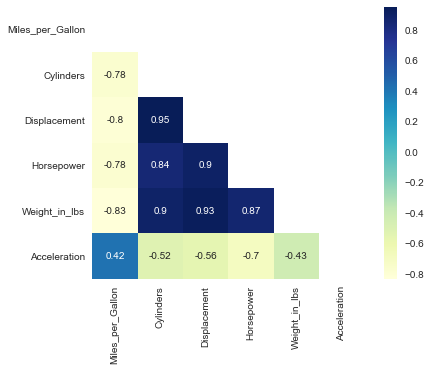

In [50]:
corrmap(cars)

There is a strong positive correlation between horsepower and Weight of the car.
On the other hand, there is a strong negative correlation between Miles per galon and cylinders.

.

<span style="font-size:large; color:blue">
Diamonds dataset from Seaborn: Pearson, Kendall and Spearman correlation comparisons
</span>

In [57]:
# Seaborn diamonds dataset
diamonds = sns.load_dataset('diamonds')

In [58]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,"53,940.000","53,940.000","53,940.000","53,940.000","53,940.000","53,940.000","53,940.000"
mean,0.798,61.749,57.457,"3,932.800",5.731,5.735,3.539
std,0.474,1.433,2.234,"3,989.440",1.122,1.142,0.706
min,0.200,43.000,43.000,326.000,0.000,0.000,0.000
25%,0.400,61.000,56.000,950.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,"2,401.000",5.700,5.710,3.530
75%,1.040,62.500,59.000,"5,324.250",6.540,6.540,4.040
max,5.010,79.000,95.000,"18,823.000",10.740,58.900,31.800


In [59]:
# pearson corr
stats.pearsonr(diamonds.carat, diamonds.price)

(0.9215913011934771, 0.0)

In [60]:
# kendall corr
stats.kendalltau(diamonds.carat, diamonds.price)

KendalltauResult(correlation=0.8341049107108127, pvalue=0.0)

In [61]:
# spearman corr
stats.spearmanr(diamonds.carat, diamonds.price)

SpearmanrResult(correlation=0.9628827988813001, pvalue=0.0)

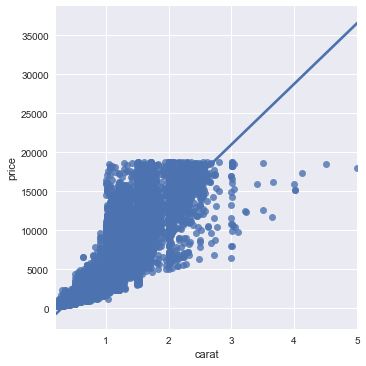

In [69]:
sns.lmplot(data=diamonds, x='carat', y='price');

Seaborn lm plot

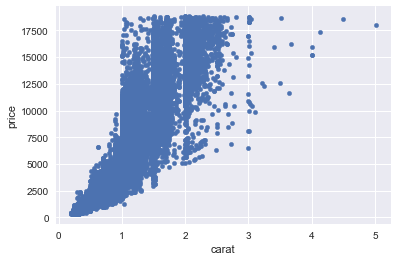

In [68]:
diamonds.plot.scatter('carat','price');

Pandas scatter plot

.

<span style='font-size:large; color:blue'>
    Spearman correlation sample
</span>

In [79]:
# we have x and y values
# consider them as student scores
scores = np.array([[2,21],[5,17],[8,14],[11,10],[15,5],[16,3]])
# convert np array to pd
scores = pd.DataFrame(scores, columns=['x','y'])
scores.style.hide_index()

x,y
2,21
5,17
8,14
11,10
15,5
16,3


In [89]:
# rank the scores
scores.rank().style.hide_index().set_precision(0)

x,y
1,6
2,5
3,4
4,3
5,2
6,1


In [90]:
# pd corr function with method: spearman
scores.corr(method='spearman')

,x,y
x,1.000,-1.000
y,-1.000,1.000


x and y are highly negative correlated

.

In [95]:
# compare with Pearson rho
scores.corr(method='pearson')

,x,y
x,1.000,-0.999
y,-0.999,1.000


.